# Notebook to play with predictions of pairwise genetic/physical interactions using different biological features such as:

- Marginal features,i.e, summary of the variable
    - common interaction partners
    - common Go terms
    - common protein domains
- Specific features
    - which GO-terms as categorical data the pair share and not share
    - from a fixed set of genes , write down with 0,1 and 2 , whether the pair has gene$_{i}$ as an interaction partner (same idea taken from the features used in the paper: **"Predicting yeast synthetic lethal genetic interactions using protein domains"** Authors: Bo Li, Feng Luo,School of Computing,Clemson University,Clemson, SC, USA,e-mail: bol, luofeng@clemson.edu,year:2009)


In [1]:
# main libraries
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from statistics import mean 
import os, fnmatch
%matplotlib inline

In [2]:
## data of all interactions for all genes

data=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\data_BioGrid\data-BioGrid-Yeast.xlsx')

In [3]:
data.head()

,gene-query,gene-target,gene-query-name,gene-target-name,interaction-type,paper-source,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,YLR418C,YOL145C,CDC73,CTR9,Affinity Capture-MS,Krogan NJ (2004),14759368,559292,559292
1,YOL145C,YLR418C,CTR9,CDC73,Affinity Capture-MS,Krogan NJ (2004),14759368,559292,559292
2,YLR418C,YOR123C,CDC73,LEO1,Affinity Capture-MS,Krogan NJ (2004),14759368,559292,559292
3,YOR123C,YLR418C,LEO1,CDC73,Affinity Capture-MS,Krogan NJ (2004),14759368,559292,559292
4,YLR418C,YBR279W,CDC73,PAF1,Affinity Capture-MS,Krogan NJ (2004),14759368,559292,559292


In [3]:

data_copy=data.copy()
data_specific=data_copy.drop(columns=['gene-query','gene-target','Unnamed: 6','Unnamed: 7','Unnamed: 8'])

In [189]:
## Function to find common (how many) interaction partners of one gene with its interactors


def common_partners(query,data):
    #print(query)
    d2 = defaultdict(dict)
    #query=['CLN1']
    # giant for loop
    
    for genes_names in query:
        #filtering the table just for the value of the query
        q1 = data[data['gene-query-name']==genes_names]
        q1_interact=q1['gene-target-name'].unique()
        
    #    # a for loop for all the interactors of query
    #     if len(q1_interact)==0: 
    #         d2[query2, 'None']["fraction-of-common-partners"] = 0
            
        for query2 in q1_interact:

        
            q2=data[data['gene-query-name']==query2] #these are get_query(q1[i])

            q2_interact=q2['gene-target-name'].unique()
        

            d = defaultdict(int)
            common = []
            tmp1=[]
            for genes_names2  in q2_interact:
                if genes_names2 in q1_interact: # if a gene interactor of the query1 is in interactors of query 2 
                    common.append(genes_names2)
                    # tmp=np.array(q1[q1['gene-target-name']==genes_names2]['interaction-type'].tolist())
                    # type_interaction.append(tmp.ravel().ravel().ravel())
                    d[genes_names2] += 1
                    
            d2[query2]['query']=genes_names

            tmp=q1[q1['gene-target-name']==query2]['interaction-type'].tolist()
            #tmp1.append(tmp)
            tmp=np.unique(np.array(tmp))
           
            if "Synthetic Lethality" in tmp:
                d2[query2]["Type"] = "Synthetic Lethality"
                        
            else:
                d2[query2]["Type"] = tmp[0]

            d2[query2]["common"] = common
            d2[query2]["names of genes"]=query2
            d2[query2]["n_common"] = len(common)
            d2[query2]["number of partners of pairA"] = len(q1_interact)
            d2[query2]["number of partners of pairB"] = len(q2_interact)

            
            
            if len(q1)==0 :
                d2[query2]["fraction-of-common-partners"] = 0
            else:
                d2[query2]["fraction-of-common-partners"] = len(d)/len(q1_interact) *100     
       

        df=pd.DataFrame(d2).T
        #df.set_index=query2
        if len(df)==0:
            df_sorted=[]
        else:
            df_sorted=df.sort_values(by=["fraction-of-common-partners"])
            df_sorted=df_sorted[::-1]

        

    return df_sorted

In [147]:
df=common_partners(['BEM1'],data=data_specific)
df.index=np.arange(0,len(df))
#df['Type']=df['Type'].astype(np.str)
df['n_common']=df['n_common'].astype(np.int)
df['fraction-of-common-partners']=df['fraction-of-common-partners'].astype(np.int)
df['number of partners of pairB']=df['number of partners of pairB'].astype(np.int)

In [168]:
if df.isnull().values.sum()==0:
    print('Hooray!! There are no NaN values in the dataframe')
else:
    print(df.isnull().values.sum())

Hooray!! There are no NaN values in the dataframe


In [148]:
df.head(3)

,query,Type,common,names of genes,n_common,number of partners of pairA,number of partners of pairB,fraction-of-common-partners
0,BEM1,PCA,"[BOI2, CDC24, FAR1, FUS3, STE11, STE5, STE7, C...",BEM1,323,323,323,100
1,BEM1,Affinity Capture-Western,"[ACT1, COF1, BUD6, PFY1, VRP1, TWF1, TPM1, SAC...",ACT1,124,323,778,38
2,BEM1,Negative Genetic,"[YEL043W, GYP1, LAS21, BRE5, RIC1, RUD3, RGP1,...",GET2,104,323,528,32


In [58]:
df.Type.value_counts()

Negative Genetic            205
Positive Genetic             34
Two-hybrid                   24
Co-fractionation             19
Affinity Capture-Western     14
Co-purification               6
Synthetic Lethality           5
Dosage Rescue                 5
Affinity Capture-MS           3
PCA                           3
Reconstituted Complex         2
Synthetic Rescue              1
Dosage Lethality              1
Synthetic Growth Defect       1
Name: Type, dtype: int64

In [138]:
df_specific=df.copy()
for i in np.arange(0,len(df_specific)):
    if df_specific.iloc[i,1]=='Synthetic Lethality' or df_specific.iloc[i,1]=='Dosage Lethality':
        df_specific.loc[df.index[i],'type-code']=1
    else:
        df_specific.loc[df.index[i],'type-code']=0
        

In [87]:
df_specific.head()

,query,Type,common,names of genes,n_common,number of partners of pairA,number of partners of pairB,fraction-of-common-partners,type-code
0,BEM1,PCA,"[BOI2, CDC24, FAR1, FUS3, STE11, STE5, STE7, C...",BEM1,323,323,323,100,0.0
1,BEM1,Affinity Capture-Western,"[ACT1, COF1, BUD6, PFY1, VRP1, TWF1, TPM1, SAC...",ACT1,124,323,778,38,0.0
2,BEM1,Negative Genetic,"[YEL043W, GYP1, LAS21, BRE5, RIC1, RUD3, RGP1,...",GET2,104,323,528,32,0.0
3,BEM1,Negative Genetic,"[STE20, ASF1, BCK1, BEM1, BEM2, BEM4, BNI1, BU...",CLA4,102,323,497,31,0.0
4,BEM1,Negative Genetic,"[GET2, RGP1, GYP1, RIC1, BEM2, CSE2, PAT1, OPI...",BRE5,97,323,772,30,0.0


In [62]:
df_specific.corr()

,n_common,number of partners of pairB,fraction-of-common-partners,type-code
n_common,1.000000,0.769872,0.999346,0.125583
number of partners of pairB,0.769872,1.000000,0.766905,0.054654
fraction-of-common-partners,0.999346,0.766905,1.000000,0.122612
type-code,0.125583,0.054654,0.122612,1.000000


In [66]:
## Function to find common (how many) GO terms of one gene with its interactors

data_goterms=pd.read_excel(r'C:\Users\linigodelacruz\Documents\PhD_2018\Documentation\Calculations\data_sgd\slim-goterms-filtered-data.xlsx',header=0)

In [67]:
data_goterms.columns=['gene-name','sgID','go-aspect','go-slim','goID','feature-type']


In [235]:
def common_go(data_go,data_common_partners):

    query=np.unique(np.array(data_common_partners['query']))
    # big for loop for each gene analyzed in common partners
    for i in np.arange(0,len(query)):
        partners=data_common_partners[data_common_partners['query']==query[i]]['names of genes']

        d2=defaultdict(dict)
        d=defaultdict(int)

        for genes in partners:
            d2[genes]['query']=query[i]
            d2[genes]['names of genes']=genes
            tmp=data_go[data_go['gene-name']==query[i]]['go-slim'].tolist()
            tmp2=data_go[data_go['gene-name']==genes]['go-slim'].tolist()
            d2[genes]['common-go-terms']=np.intersect1d(tmp,tmp2)
            d2[genes]['fraction-of-common-go']=len(np.intersect1d(tmp,tmp2))/len(tmp) *100

        

    df=pd.DataFrame(d2).T
  



    return df

In [150]:
df_go=common_go(data_goterms,df_specific)

In [170]:
df_join=df_specific.copy()
df_join['fraction-of-common-go']=df_go['fraction-of-common-go'].tolist()

In [171]:
df_join.corr()
df_join=df_join.drop(columns='n_common')


In [172]:
df_join.head(5)

,query,Type,common,names of genes,number of partners of pairA,number of partners of pairB,fraction-of-common-partners,type-code,fraction-of-common-go
0,BEM1,PCA,"[BOI2, CDC24, FAR1, FUS3, STE11, STE5, STE7, C...",BEM1,323,323,100,0.0,100.0
1,BEM1,Affinity Capture-Western,"[ACT1, COF1, BUD6, PFY1, VRP1, TWF1, TPM1, SAC...",ACT1,323,778,38,0.0,50.0
2,BEM1,Negative Genetic,"[YEL043W, GYP1, LAS21, BRE5, RIC1, RUD3, RGP1,...",GET2,323,528,32,0.0,10.0
3,BEM1,Negative Genetic,"[STE20, ASF1, BCK1, BEM1, BEM2, BEM4, BNI1, BU...",CLA4,323,497,31,0.0,30.0
4,BEM1,Negative Genetic,"[GET2, RGP1, GYP1, RIC1, BEM2, CSE2, PAT1, OPI...",BRE5,323,772,30,0.0,10.0


In [173]:
df_join.corr()

,number of partners of pairB,fraction-of-common-partners,type-code,fraction-of-common-go
number of partners of pairB,1.000000,0.766905,0.054654,0.082108
fraction-of-common-partners,0.766905,1.000000,0.122612,0.287631
type-code,0.054654,0.122612,1.000000,0.108974
fraction-of-common-go,0.082108,0.287631,0.108974,1.000000


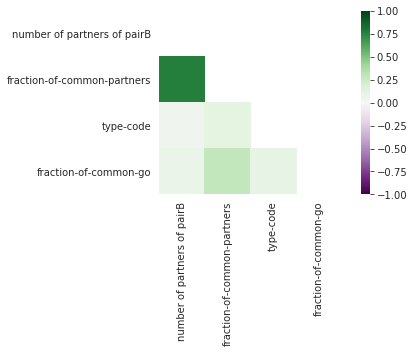

In [168]:
corr = df_join.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
import matplotlib.cm as cm
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1,vmin=-1 ,square=True,cmap=cm.PRGn)
#ax.set_title('Lethality correlation with Mean and std')
plt.tight_layout()

## For many genes still I need to solve the for loop

In [228]:
## for many genes

#query=np.unique(np.array(data['gene-query-name']))[10:20]
query=[['BEM1'],['BEM3']]
common_partner_bem3=common_partners(query=query[1],data=data_specific)
common_partner_bem1=common_partners(query=query[0],data=data_specific)


common_bem1_bem3=pd.concat([common_partner_bem1,common_partner_bem3],keys=[query[0][0],query[1][0]])

In [237]:
common_go_bem1=common_go(data_goterms,common_partner_bem1)
common_go_bem3=common_go(data_goterms,common_partner_bem3)

In [238]:
common_go_bem1_bem3=pd.concat([common_go_bem1,common_go_bem3],keys=[query[0][0],query[1][0]])

In [255]:
df_join_13=common_bem1_bem3.copy()
df_join_13.index=np.arange(0,len(df_join_13))
df_join_13['fraction-of-common-go']=common_go_bem1_bem3['fraction-of-common-go'].tolist()

In [256]:
df_join_13['n_common']=df_join_13['n_common'].astype(np.int)
df_join_13['fraction-of-common-partners']=df_join_13['fraction-of-common-partners'].astype(np.int)
df_join_13['number of partners of pairB']=df_join_13['number of partners of pairB'].astype(np.int)


In [261]:
df_specific_join=df_join_13.copy()
for i in np.arange(0,len(df_specific_join)):
    if df_specific_join.iloc[i,1]=='Synthetic Lethality' or df_specific_join.iloc[i,1]=='Dosage Lethality':
        df_specific_join.loc[df_join_13.index[i],'type-code']=1
    else:
        df_specific_join.loc[df_join_13.index[i],'type-code']=0

In [264]:
df_specific_join.corr()

,n_common,number of partners of pairB,fraction-of-common-partners,fraction-of-common-go,type-code
n_common,1.000000,0.724375,0.773403,0.212878,0.113669
number of partners of pairB,0.724375,1.000000,0.737596,0.122416,0.051719
fraction-of-common-partners,0.773403,0.737596,1.000000,0.412417,0.132134
fraction-of-common-go,0.212878,0.122416,0.412417,1.000000,0.121565
type-code,0.113669,0.051719,0.132134,0.121565,1.000000


In [174]:
## construction of feature matrix

X,y= df_join[['fraction-of-common-partners','fraction-of-common-go']],df_join['type-code']

In [ ]:
## Function to find common (how many) protein domains of one gene with its interactors